# DATA WRANGLING

In [122]:
# Import packages and import data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline
url = 'https://raw.githubusercontent.com/q-x-yang/Datasets/master/listings-1.csv'
df = pd.read_csv(url)
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,2.019100e+13,10/14/19,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,7/31/08,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a day,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,...,$25.00,1,30,1,1,30,30,1.0,30.0,2 months ago,t,3,8,16,85,10/14/19,217,52,7/23/09,9/21/19,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,1,0,0,1.74
1,3850,https://www.airbnb.com/rooms/3850,2.019100e+13,10/14/19,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",House Rule footnotes: 1.\tI don’t allow check ...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",Airbnb has no default house rules that hosts c...,NaN,NaN,https://a0.muscache.com/im/pictures/b6e97d2a-1...,NaN,4921,https://www.airbnb.com/users/show/4921,Kevin,12/8/08,"San Francisco, California, United States",I am a retired software developer now raising ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/97d29791-d...,https://a0.muscache.com/im/pictures/97d29791-d...,Inner Sunset,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, CA, United States",Inner Sunset,Inner Sunset,...,$20.00,1,5,1,1,5,5,1.0,5.0,3 days ago,t,5,32,62,62,10/14/19,160,36,7/16/09,9/30/19,94.0,10.0,10.0,10.0,10.0,10.0,10.0,t,STR-0000346,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.28
2,5858,https://www.airbnb.com/rooms/5858,2.019100e+13,10/14/19,Creative Sanctuary,NaN,We live in 

In [123]:
df.shape

(8111, 106)

Data Organization

In [124]:
for i in df.columns[:]:
  print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [125]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1605
Length: 106, dtype: int64

In [126]:
def missing(df):
    print(round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False).head(30))
missing(df)

neighbourhood_group_cleansed    100.00
host_acceptance_rate            100.00
thumbnail_url                   100.00
xl_picture_url                  100.00
medium_url                      100.00
square_feet                      98.47
monthly_price                    87.13
weekly_price                     86.82
notes                            38.32
license                          37.12
access                           35.89
interaction                      32.35
transit                          29.77
house_rules                      26.83
host_about                       25.04
neighborhood_overview            24.88
security_deposit                 20.86
review_scores_value              20.40
review_scores_location           20.40
review_scores_checkin            20.40
review_scores_cleanliness        20.39
review_scores_accuracy           20.39
review_scores_communication      20.38
review_scores_rating             20.36
reviews_per_month                19.79
last_review              

In [127]:
for i in df.columns:
    print (i + ', Number of Missing Values:', len(df[i][df[i].isnull()]))

id, Number of Missing Values: 0
listing_url, Number of Missing Values: 0
scrape_id, Number of Missing Values: 0
last_scraped, Number of Missing Values: 0
name, Number of Missing Values: 0
summary, Number of Missing Values: 225
space, Number of Missing Values: 1134
description, Number of Missing Values: 50
experiences_offered, Number of Missing Values: 0
neighborhood_overview, Number of Missing Values: 2018
notes, Number of Missing Values: 3108
transit, Number of Missing Values: 2415
access, Number of Missing Values: 2911
interaction, Number of Missing Values: 2624
house_rules, Number of Missing Values: 2176
thumbnail_url, Number of Missing Values: 8111
medium_url, Number of Missing Values: 8111
picture_url, Number of Missing Values: 0
xl_picture_url, Number of Missing Values: 8111
host_id, Number of Missing Values: 0
host_url, Number of Missing Values: 0
host_name, Number of Missing Values: 8
host_since, Number of Missing Values: 8
host_location, Number of Missing Values: 13
host_about

In [128]:
Unrelated_cols = ['id', 'last_scraped', 'listing_url', 'scrape_id', 'last_review', 'name', 'experiences_offered', 
                 'picture_url', 'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url','host_neighbourhood', 
                 'host_listings_count', 'host_total_listings_count', 'host_verifications',
                 'street','city', 'state', 'market', 'smart_location', 'country', 'country_code', 'is_location_exact', 'minimum_minimum_nights', 
                 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'first_review', 'calendar_updated', 'has_availability', 
                 'availability_30', 'availability_60', 'availability_90', 'availability_365','calendar_last_scraped','requires_license', 'jurisdiction_names', 
                 'is_business_travel_ready', 'calculated_host_listings_count_entire_homes', 'reviews_per_month',
                 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'require_guest_profile_picture', 
                  'require_guest_phone_verification', 'host_location', 'host_about']
#All columns with more than 30% of data missing are grouped into missing columns and will be dropped from the dataset.
missing_cols = ['neighbourhood_group_cleansed', 'host_acceptance_rate', 'thumbnail_url', 'xl_picture_url', 'medium_url', 
                'square_feet', 'monthly_price', 'weekly_price', 'notes', 'license', 'access', 'interaction']
#Text columns will not be dropped from the dataset, rather they will used to conduct the Sentiment analysis using NLP.
Text_cols = ['summary', 'space', 'description', 'neighborhood_overview', 'transit','house_rules', 'host_about']
df1 = df.drop(columns=Unrelated_cols).drop(columns=missing_cols)

Data Definition

In [129]:
# Print summaries for the table again
print ("Rows     : " ,df1.shape[0])
print ("Columns  : " ,df1.shape[1])
print ("\nFeatures : \n" ,df1.columns.tolist())
print ("\nMissing values :  ", df1.isnull().sum().values.sum())
print ("\nUnique values :  \n",df1.nunique())

Rows     :  8111
Columns  :  44

Features : 
 ['summary', 'space', 'description', 'neighborhood_overview', 'transit', 'house_rules', 'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'calculated_host_listings_count']

Missing values :   24368

Unique values :  
 summary                           6523
space                             5697
descript

Data Definition

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   summary                         7886 non-null   object 
 1   space                           6977 non-null   object 
 2   description                     8061 non-null   object 
 3   neighborhood_overview           6093 non-null   object 
 4   transit                         5696 non-null   object 
 5   house_rules                     5935 non-null   object 
 6   host_since                      8103 non-null   object 
 7   host_response_time              7184 non-null   object 
 8   host_response_rate              7184 non-null   object 
 9   host_is_superhost               8103 non-null   object 
 10  host_has_profile_pic            8103 non-null   object 
 11  host_identity_verified          8103 non-null   object 
 12  neighbourhood                   81

In [131]:
df1.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
count,8111.000000,8111.000000,8111.000000,8099.000000,8107.000000,8102.000000,8111.000000,8.111000e+03,8.111000e+03,8111.000000,8111.000000,6460.000000,6457.000000,6457.000000,6456.000000,6458.000000,6456.000000,6456.000000,8111.000000
mean,37.766054,-122.430107,3.160769,1.395975,1.345874,1.744754,1.718407,1.234526e+04,1.284597e+04,45.203181,13.712736,95.421517,9.752207,9.603686,9.847584,9.817745,9.682776,9.375155,22.329799
std,0.022937,0.026967,1.896988,0.923213,0.925298,1.158799,1.334492,1.110357e+06,1.110352e+06,78.437987,22.523539,7.571031,0.732872,0.839768,0.593539,0.659274,0.715906,0.879174,54.369225
min,37.704630,-122.513060,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,37.751450,-122.442830,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+00,2.900000e+01,1.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000
50%,37.769150,-122.424650,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000e+00,1.800000e+02,10.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000
75%,37.785670,-122.410615,4.000000,1.500000,2.000000,2.000000,2.000000,3.000000e+01,1.125000e+03,54.000000,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,37.828790,-122.368570,16.000000,14.000000,14.000000,14.000000,16.000000,1.000000e+08,1.000000e+08,757.000000,258.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,248.000000


Data Cleaning

In [132]:
# host_response_rate has to be changed to int from object
df1['host_response_rate'] = df1['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [133]:
# zipcode has be to be changed from object to int64
df1['zipcode'].unique()

array(['94117', '94131', '94110', '94107', '94109', '94102', '94114',
       '94105', '94133', '94115', '94121', '94118', '94127', '94104',
       '94122', '94123', '94112', '94108', '94111', '94103', '94124',
       '94113', '94116', '94129', '94132', nan, '94134', '94158', '94014',
       'CA 94108', 'CA 94107', 'CA 94158', 'CA 94103', 'CA 94115',
       'CA 94109', 'CA 94117', 'CA 94102', 'CA 94131', 'CA 94105', 'CA',
       'CA 94110', 'CA 94123', 'CA 94114', '94015', '94130'], dtype=object)

In [134]:
df1['zipcode_new'] = df['zipcode'].str.extract('(\d+)').astype(float)
df1['zipcode_new'].unique()

array([94117., 94131., 94110., 94107., 94109., 94102., 94114., 94105.,
       94133., 94115., 94121., 94118., 94127., 94104., 94122., 94123.,
       94112., 94108., 94111., 94103., 94124., 94113., 94116., 94129.,
       94132.,    nan, 94134., 94158., 94014., 94015., 94130.])

In [135]:
drop_cols = ['zipcode']

In [136]:
# price columns which include price security_deposit, cleaning_fee, extra people all have "$" sign in front of all the numbers. We will need to remove the dollar sign
# and then remove anything that isn't a number
import re
price_cols = ['price','cleaning_fee','security_deposit','extra_people']
for col in price_cols:
    df1[col] = df1[col].fillna("0")
    df1[col] = df1[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

In [137]:
# host_since column has to be converted to date time format
df1['host_since'] = pd.to_datetime(df1['host_since'])

In [138]:
#Re-run the data types for the dataset and scrutinize if there's any other column that has inappropriate data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   summary                         7886 non-null   object        
 1   space                           6977 non-null   object        
 2   description                     8061 non-null   object        
 3   neighborhood_overview           6093 non-null   object        
 4   transit                         5696 non-null   object        
 5   house_rules                     5935 non-null   object        
 6   host_since                      8103 non-null   datetime64[ns]
 7   host_response_time              7184 non-null   object        
 8   host_response_rate              7184 non-null   float64       
 9   host_is_superhost               8103 non-null   object        
 10  host_has_profile_pic            8103 non-null   object        
 11  host

In [139]:
df1.sample(10)

,summary,space,description,neighborhood_overview,transit,house_rules,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,zipcode_new
2671,Welcome to Eichler by Troy! My super bright an...,Registered Short-Term Residential Rental Certi...,Welcome to Eichler by Troy! My super bright an...,Diamond Heights is nestled atop one of the man...,Once you experience the peace and tranquility ...,NaN,2016-06-24,NaN,NaN,f,t,t,Diamond Heights,Diamond Heights,94131,37.74608,-122.44440,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Wheelchair accessible"",Kitchen,""Free pa...",140.0,400.0,50.0,2,0.0,2,14,19,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,1,94131.0
1142,A quintessential San Francisco experience at i...,"This charming, glamorous, luxury Victorian apa...",A quintessential San Francisco experience at i...,NaN,Convenient location with MUNI stops just a few...,Thank you in advance for following the house r...,2011-11-19,within an hour,1.00,f,t,t,Western Addition/NOPA,Western Addition,94115,37.78876,-122.42990,Condominium,Entire home/apt,6,1.0,2.0,3.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",350.0,2000.0,140.0,4,100.0,30,1125,105,4,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,2,94115.0
5413,Private room available for rent! My husband an...,Newly renovated flat in the Mission District. ...,Private room available for rent! My husband an...,The apartment is located in the Mission Distri...,Public transit options are cheap and close by ...,- Quiet hours are between 10PM and 8AM - Check...,2018-08-03,within an hour,1.00,t,t,f,Mission District,Mission,94110,37.75302,-122.40478,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d...",65.0,300.0,130.0,1,0.0,30,120,2,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,flexible,2,94110.0
558,"A Queen Anne cottage built in 1890, it looks s...","Our lovely Queen Anne home dates from 1890, th...","A Queen Anne cottage built in 1890, it looks s...",Our home is in the Lower Haight neighborhood b...,Our home is centrally located and it's easy to...,Please be clean and decent and respectful of o...,2013-04-22,within a day,1.00,t,t,t,Duboce Triangle,Western Addition,94117,37.77093,-122.43008,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",500.0,1000.0,150.0,1,0.0,3,1125,38,10,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,1,94117.0
4778,Rent my hotel style condo timeshare week. Stay...,"One bedroom, two bath hotel style condo: Queen...",Rent my hotel style condo timeshare week. Stay...,Downtown San Francisco is all yours from this ...,Walk and take public transportation to anywher...,- Check in is any time after 4:00,2016-01-23,within a few hours,0.90,f,t,t,Union Square,Downtown/Civic Center,94108,37.78966,-122.40732,Boutique hotel,Private room,4,2.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",325.0,0.0,0.0,1,0.0,2,24,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible,36,94108.0
1262,We love sharing our apartment when we travel! ...,NaN,We love sharing our apartment when we travel! ...,NaN,NaN,No noise after 10 pm No smoking No pets,2012-11-28,within an hour,1.00,t,t,t,Mission District,Mission,94110,37.76055,-122.42568,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",250.0,300.0,150.0,1,0.0,3,1125,19,5,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict

In [140]:
#Let's look at the residual columns with missing values
#First look at numeric columns that have missing values
for y in df1.columns:
    if(df1[y].dtype == np.float64 or df1[y].dtype == np.int64):
      if(df1[y].isna().sum()>0):
          print(y, df1[y].isna().sum())

host_response_rate 927
bathrooms 12
bedrooms 4
beds 9
review_scores_rating 1651
review_scores_accuracy 1654
review_scores_cleanliness 1654
review_scores_checkin 1655
review_scores_communication 1653
review_scores_location 1655
review_scores_value 1655
zipcode_new 246


In [141]:
#For host_response_rate, bathrooms, bedrooms, beds, fill in the NA with 0
df1['host_response_rate'] = df1['host_response_rate'].fillna(0)
df1['bathrooms'] = df1['bathrooms'].fillna(0) 
df1['bedrooms'] = df1['bedrooms'].fillna(0) 
df1['beds'] = df1['beds'].fillna(0)

In [142]:
#For the rest of the columns, drop the rows with NA
df1 = df1.dropna(how='any', subset=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                                    'review_scores_value', 'zipcode_new'])

In [143]:
#Then we can proceed to check descriptive columns that have missing values
for y in df1.columns:
    if(df1[y].dtype == np.object):
      if(df1[y].isna().sum()>0):
          print(y, df1[y].isna().sum())

summary 175
space 789
description 18
neighborhood_overview 1301
transit 1367
house_rules 1409
host_response_time 678
host_is_superhost 8
host_has_profile_pic 8
host_identity_verified 8


In [144]:
# Fill out the missing descriptions with "N/A", for host_response_time, fill out the missing descriptions as 'a few days or more',
# For Y/N questions like 'host_is_superhost', fill out the missing values as 'f'
df1['summary'] = df1['summary'].fillna('N/A')
df1['space'] = df1['space'].fillna('N/A')
df1['description'] = df1['description'].fillna('N/A')
df1['neighborhood_overview'] = df1['neighborhood_overview'].fillna('N/A')
df1['transit'] = df1['transit'].fillna('N/A')
df1['house_rules'] = df1['house_rules'].fillna('N/A')
df1['host_response_time'] = df1['host_response_time'].fillna('a few days or more')
df1['host_is_superhost'] = df1['host_is_superhost'].fillna('f')
df1['host_has_profile_pic'] = df1['host_has_profile_pic'].fillna('f')
df1['host_identity_verified'] = df1['host_identity_verified'].fillna('f')

In [145]:
#For datetime42 type colume "host_since", drop the missing values
df1 = df1.dropna(how='any', subset=['host_since'])

In [146]:
#Check for Any remaining missing value
df1.isna().sum()[df1.isna().sum()>0]

Series([], dtype: int64)

In [147]:
# Drop price equal to 9999 and 8000 which are extreme values/errors
df1['price'].describe()

count    6324.000000
mean      214.727388
std       283.587975
min         0.000000
25%        99.000000
50%       150.000000
75%       245.000000
max      9999.000000
Name: price, dtype: float64

In [148]:
df1 = df1[df1.price != 9999]
df1 = df1[df1.price != 8000]

In [149]:
df1['price'].describe()

count    6322.000000
mean      211.948276
std       236.021277
min         0.000000
25%        99.000000
50%       150.000000
75%       245.000000
max      5000.000000
Name: price, dtype: float64

#EDA

There are mainly 3 parts in EDA:


*   Analyze the seasonality
*   Since we still have 40+ variables, we will analyze Multicollinearity



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


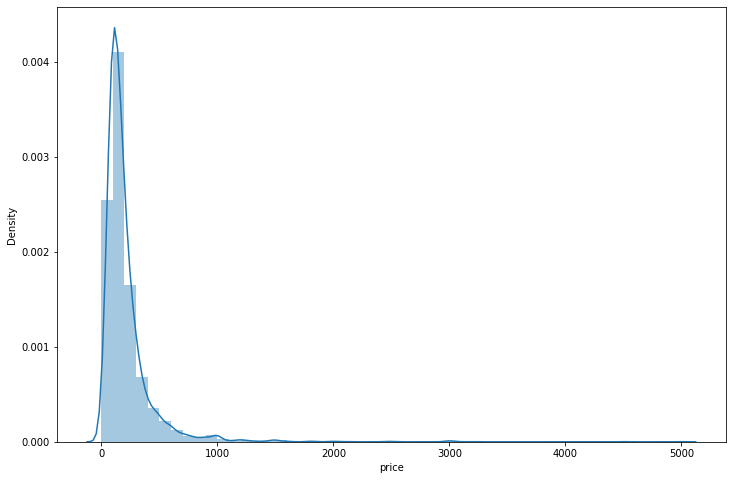

In [150]:
#We are done cleaning the data for extreme prices. Lets now take a cloer look at the distribution of prices
plt.figure(figsize=(12,8))
sns.distplot(df1.price);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


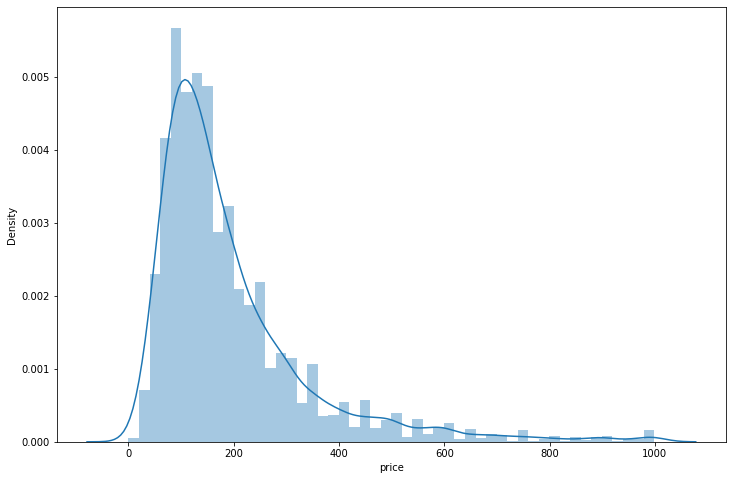

In [151]:
#Since the price distribution has a long trail to the right, lets zoom into prices lower than $1000
plt.figure(figsize=(12,8))
sns.distplot(df1.price[df1.price<1000])

In [152]:
print(len(df1[df1.price>1000]))

67


In [153]:
print(df1.price.describe())

count    6322.000000
mean      211.948276
std       236.021277
min         0.000000
25%        99.000000
50%       150.000000
75%       245.000000
max      5000.000000
Name: price, dtype: float64


In [154]:
#We now have a pretty good sense of how price distribution is like. The distribution is skewed to the left with mean of $211.9 and there are 67 listings above $1000.

In [155]:
#Next, we proceed to analyze the seasonality based on host_since dates and see if there's any trend.
df1['host_since'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    6322
unique                   2171
top       2012-12-17 00:00:00
freq                       63
first     2008-03-03 00:00:00
last      2019-10-04 00:00:00
Name: host_since, dtype: object

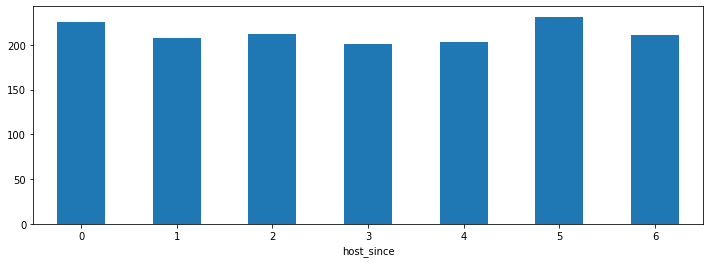

In [156]:
#The dataset contains listings from 2008-03-03 to 2019-10-04
#First, Plot the graph to see if the prices vary by what day of the week it's listed
fig, axs = plt.subplots(figsize=(12, 4))
df1.groupby(df1["host_since"].dt.weekday)["price"].mean().plot(kind='bar', rot=0, ax=axs)

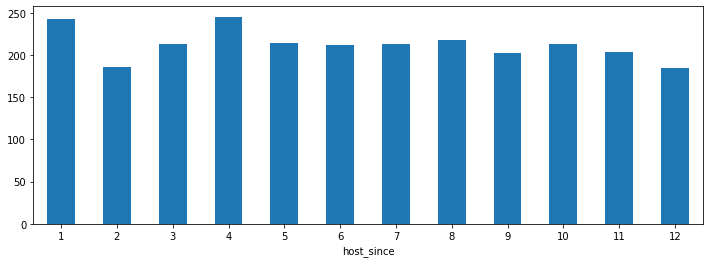

In [157]:
#It seems that the airbnb listings on Friday, Saturday and Sunday tend to have a higher price.
#Plot the graph to see if the prices vary by which month it's listed
fig, axs = plt.subplots(figsize=(12, 4))
df1.groupby(df1["host_since"].dt.month)["price"].mean().plot(kind='bar', rot=0, ax=axs)

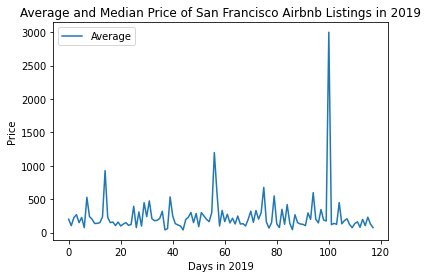

In [158]:
#Now, we plot the price by "host since" time to see if there's any seasonality by taking a closer look at year 2019.
year2019 = (df1['host_since'] > '2018-12-31') & (df1['host_since'] <= '2019-12-31')
df2019 = df1.loc[year2019]
df_season = df2019[['host_since','price']]
#Taking average/median values as well as plotting
date=[]
avg_price=[]
median_price=[]
for i in df_season['host_since'].unique():
    date.append(i)
    avg_price.append(df_season[df_season['host_since'] == i]['price'].mean())
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.ylabel('Price')
plt.xlabel('Days in 2019')
plt.title('Average and Median Price of San Francisco Airbnb Listings in 2019')
plt.legend()

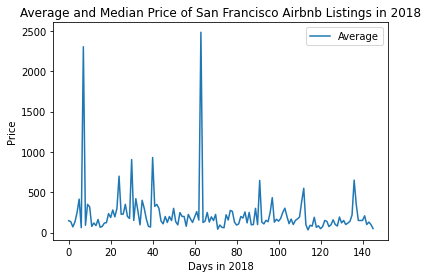

In [159]:
#Similarly, we plot the average and mean values for 2018.
year2018 = (df1['host_since'] > '2017-12-31') & (df1['host_since'] <= '2018-12-31')
df2018 = df1.loc[year2018]
df_season1 = df2018[['host_since','price']]
date=[]
avg_price=[]
median_price=[]
for i in df_season1['host_since'].unique():
    date.append(i)
    avg_price.append(df_season1[df_season1['host_since'] == i]['price'].mean())
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.ylabel('Price')
plt.xlabel('Days in 2018')
plt.title('Average and Median Price of San Francisco Airbnb Listings in 2018')
plt.legend()

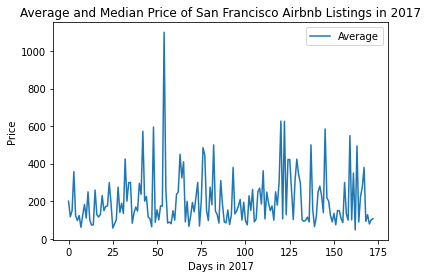

In [160]:
#Then 2017
year2017 = (df1['host_since'] > '2016-12-31') & (df1['host_since'] <= '2017-12-31')
df2017 = df1.loc[year2017]
df_season2 = df2017[['host_since','price']]
date=[]
avg_price=[]
median_price=[]
for i in df_season2['host_since'].unique():
    date.append(i)
    avg_price.append(df_season2[df_season2['host_since'] == i]['price'].mean())
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.ylabel('Price')
plt.xlabel('Days in 2017')
plt.title('Average and Median Price of San Francisco Airbnb Listings in 2017')
plt.legend()

In [161]:
#There seems to be very little seasonality year over year based on when the property was listed.

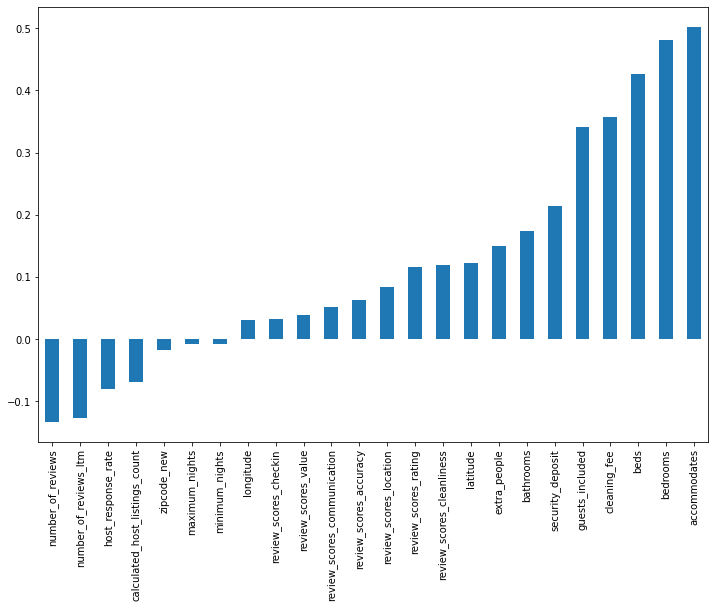

In [162]:
#Before we deep dive into the Multicollinearity, we need to understand how the correlation is between the y variable 'price' and the other features
plt.figure(figsize=(12,8))
df1.corr()['price'].sort_values().iloc[:-1].plot.bar();

In [163]:
# create subset of table for numerical variables
num_cols=df1.select_dtypes([np.int64,np.float64]).columns

In [164]:
df_num = df1[num_cols].drop(columns=['price','latitude','longitude','zipcode_new'])

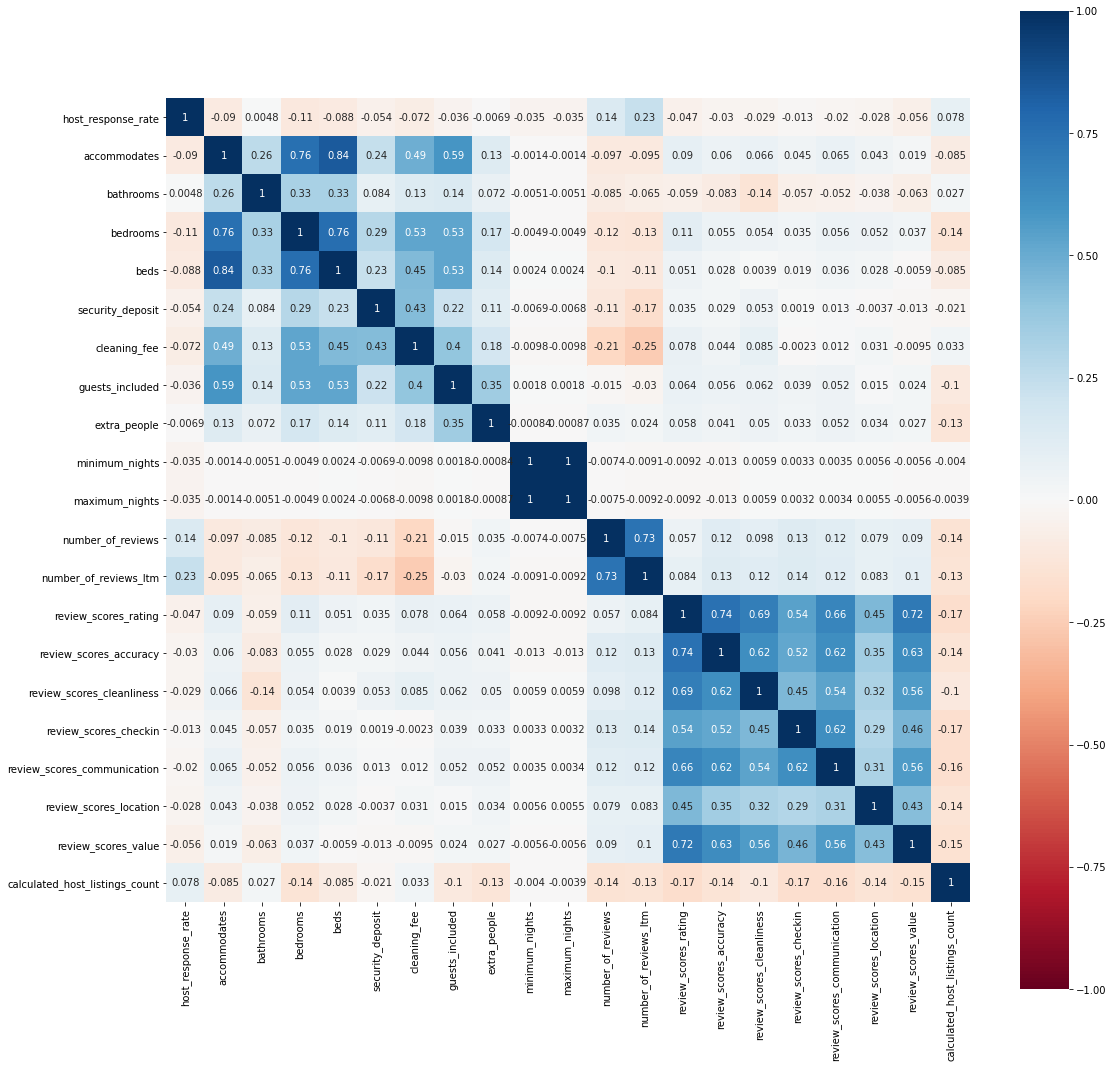

In [165]:
#Using the subset of numerical variables, we are going to create a heatmap of correlation of all numerical variables (excluding y variable price)
#After we examine the correlation, we will remove the features that are highly correlated that can potentially create Multicollinearity
plt.figure(figsize=(18,18))
sns.heatmap(df_num.corr(), vmax=1, vmin=-1, cmap='RdBu', square=True, annot=True);

In [166]:
#We proceed to quickly identify the pairs of features that are at least 75% correlated with each other using corr(),melt and sort by values greater than 0.75
#Then we will go ahead and remove one feature of each pair
corr_matrix = df_num.corr()
cols = corr_matrix.columns
corr_matrix.reset_index(inplace=True)
corr_matrix = corr_matrix.melt(id_vars='index', value_vars=cols)
corr_matrix = corr_matrix[corr_matrix['index']!=corr_matrix['variable']]
corr_matrix = corr_matrix[corr_matrix['value'].abs()>0.75]

print(corr_matrix.shape)
corr_matrix

(8, 3)


,index,variable,value
24,bedrooms,accommodates,0.755270
25,beds,accommodates,0.837077
64,accommodates,bedrooms,0.755270
67,beds,bedrooms,0.762877
85,accommodates,beds,0.837077
87,bedrooms,beds,0.762877
199,maximum_nights,minimum_nights,0.999999
219,minimum_nights,maximum_nights,0.999999


In [167]:
Corr_cols = ['beds','bedrooms','maximum_nights']
df2 = df1.drop(columns=Corr_cols)
df2.sample(3)

,summary,space,description,neighborhood_overview,transit,house_rules,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,zipcode_new
7552,Tropical retreat in the heart of San Francisco...,The guest suite consists of queen size bed and...,Tropical retreat in the heart of San Francisco...,We like to host visitors and we'll be happy to...,Everything you need is a short walk away on Di...,-Please remove shoes when you enter the house ...,2014-12-21,within an hour,1.0,t,t,f,Western Addition/NOPA,Haight Ashbury,94117,37.77371,-122.43882,Condominium,Private room,2,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",499.0,2000.0,150.0,1,20.0,1,7,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,3,94117.0
1720,The front room of a 1910 Edwardian flat with t...,"A home away from home. After a long day, it's...",The front room of a (Phone number hidden by Ai...,Diversity. Our neighborhood is a great mix of...,The 21 Hayes is across the street; The 5 Fult...,1) Check in after 3pm/ Check out by noon. 2) ...,2013-10-02,within an hour,1.0,t,t,t,Western Addition/NOPA,Haight Ashbury,94117,37.77498,-122.44355,Condominium,Private room,1,1.5,Real Bed,"{Wifi,Kitchen,""Indoor fireplace"",Heating,""Fami...",88.0,0.0,45.0,1,35.0,2,143,48,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,4,94117.0
5593,"Newly updated flat, centrally located on famou...",Your home away from home will be a newly refu...,"Newly updated flat, centrally located on famou...","You will be staying directly in Chinatown, one...",Our public municipal transportation system (MU...,"- Please take shoes off at entrance, fresh hou...",2018-10-19,within a few hours,1.0,t,t,f,Telegraph Hill,Russian Hill,94133,37.79781,-122.40780,Apartment,Entire home/apt,6,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",300.0,500.0,100.0,4,50.0,2,13,13,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,1,94133.0


In [168]:
#Neighborhood vs. Price
print(df2['neighbourhood'].describe())
print(df2['neighbourhood_cleansed'].describe())

count                 6322
unique                  55
top       Mission District
freq                   610
Name: neighbourhood, dtype: object
count        6322
unique         36
top       Mission
freq          617
Name: neighbourhood_cleansed, dtype: object


In [169]:
#List the number of listings by neighbourhood_cleansed
df2.groupby(by='neighbourhood_cleansed').count()[['summary']].sort_values(by='summary', ascending=False).head(5)

,summary
neighbourhood_cleansed,
Mission,617
Downtown/Civic Center,487
Western Addition,469
South of Market,380
Castro/Upper Market,368


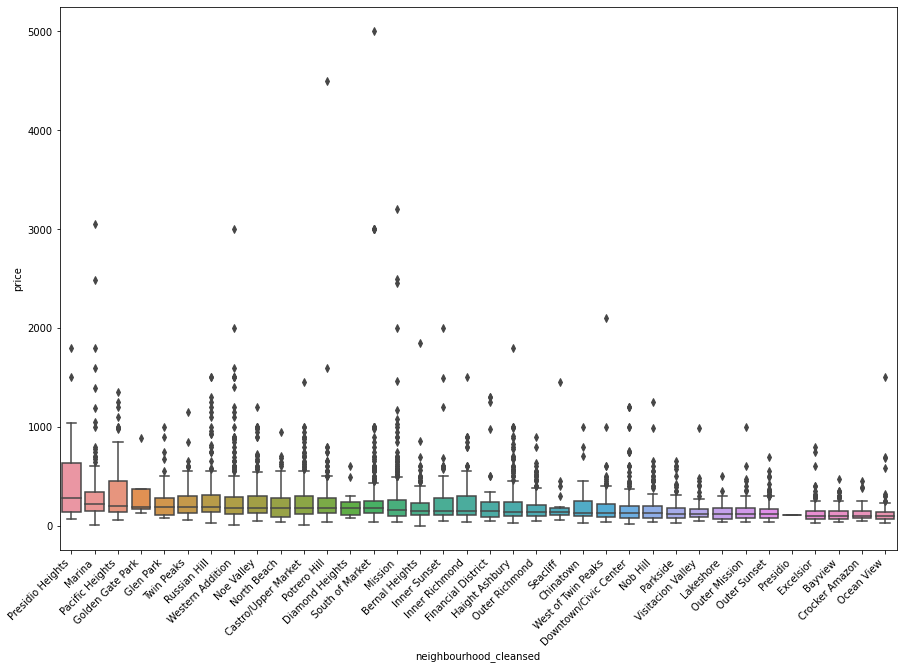

In [170]:
#neighbourhood_cleansed has fewer unique values, we are going to scrutinize more closely on the the distribution of price on neighbourhood_cleansed
order = df2.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False).index
plt.figure(figsize=(15,10))
sns.boxplot(y='price', x='neighbourhood_cleansed', data=df2, order=order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

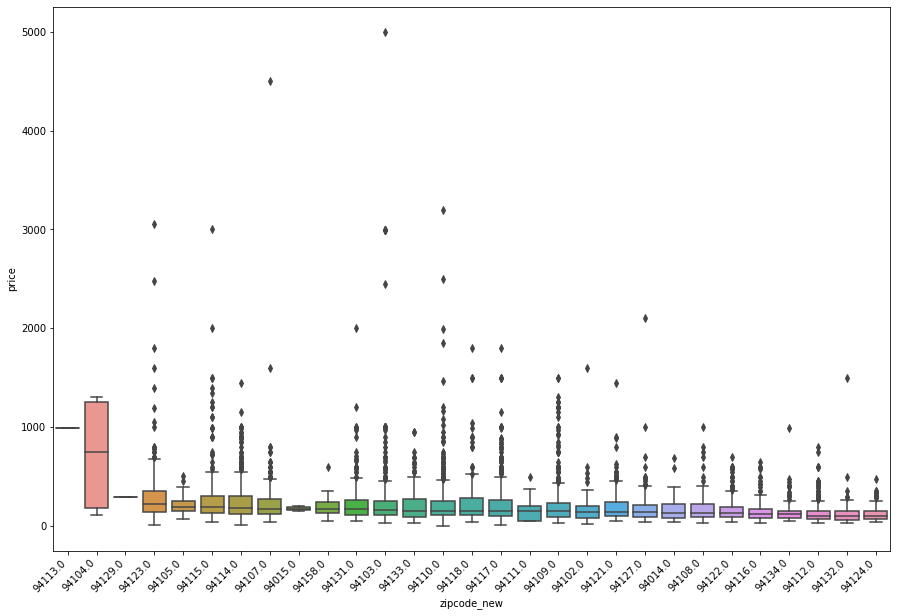

In [171]:
#We can also plot the same graph for zipcodes
order1 = df2.groupby('zipcode_new')['price'].median().sort_values(ascending=False).index
plt.figure(figsize=(15,10))
sns.boxplot(y='price', x='zipcode_new', data=df2, order=order1)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

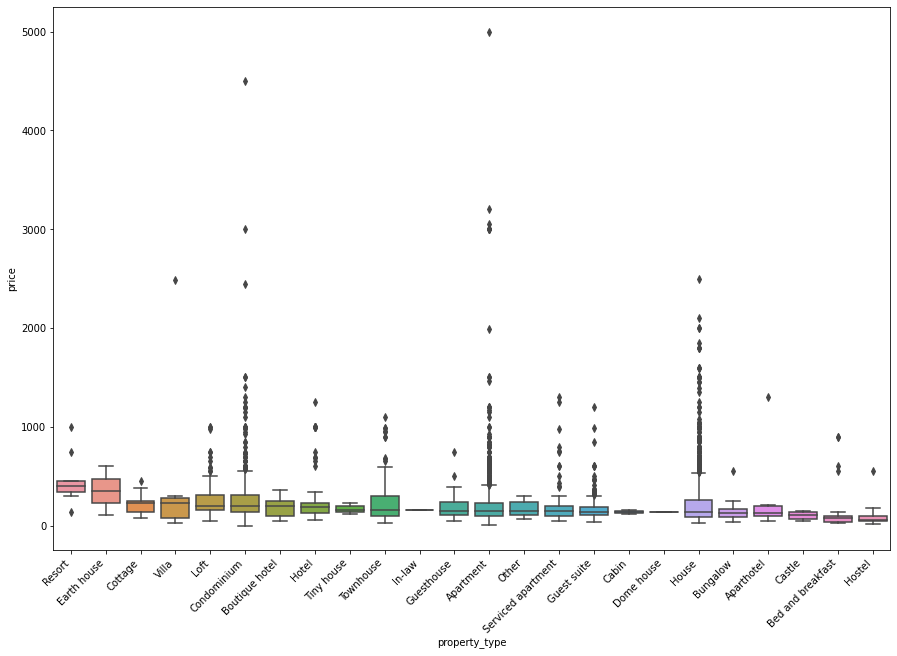

In [172]:
#We can also plot the same graph for property types
order2 = df2.groupby('property_type')['price'].median().sort_values(ascending=False).index
plt.figure(figsize=(15,10))
sns.boxplot(y='price', x='property_type', data=df2, order=order2)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

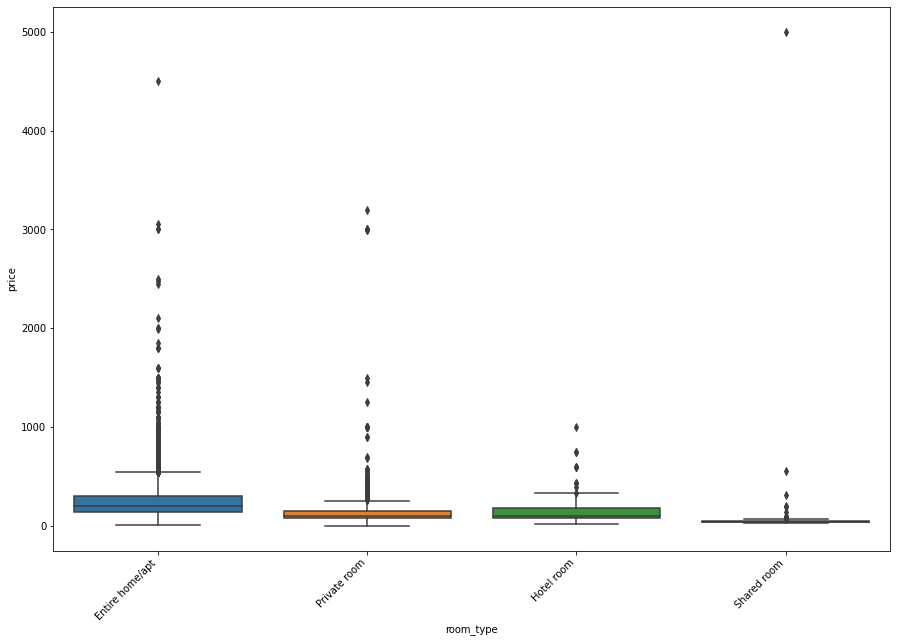

In [173]:
#We can also plot the same graph for room types
order3 = df2.groupby('room_type')['price'].median().sort_values(ascending=False).index
plt.figure(figsize=(15,10))
sns.boxplot(y='price', x='room_type', data=df2, order=order3)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

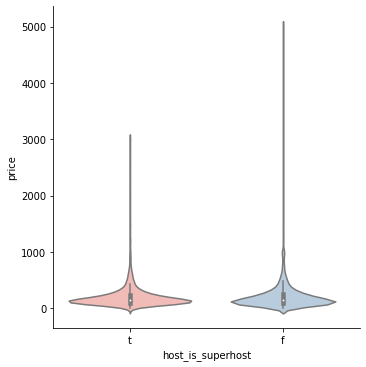

In [174]:
# Catplot price related to whether host_is_superhost
g = sns.catplot(x="host_is_superhost", y = "price",data = df2, kind="violin", palette = "Pastel1")

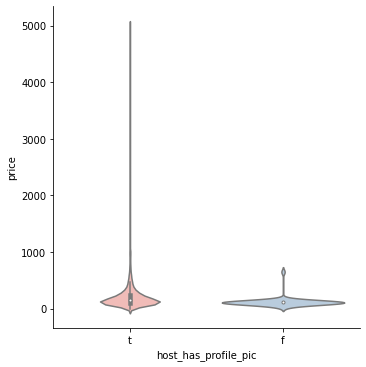

In [175]:
# Catplot price related to whether host_has_profile_pic
g = sns.catplot(x="host_has_profile_pic", y = "price",data = df2, kind="violin", palette = "Pastel1")

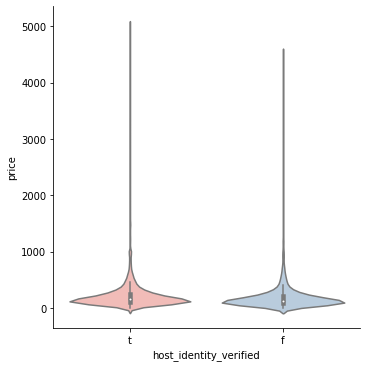

In [176]:
# Catplot price related to whether host_identity_verified
g = sns.catplot(x="host_identity_verified", y = "price",data = df2, kind="violin", palette = "Pastel1")

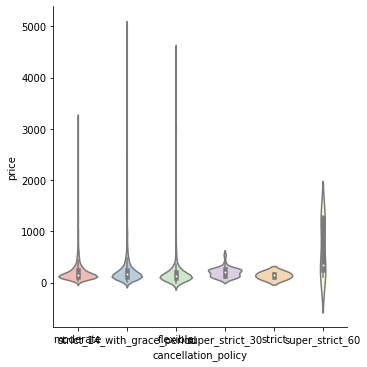

In [177]:
# Catplot price related to cancellation_policy
g = sns.catplot(x="cancellation_policy", y = "price",data = df2, kind="violin", palette = "Pastel1")

In [178]:
#Catplot for cancellation_policy is not clear. We will try to use histogram
df2['cancellation_policy'].unique()

array(['moderate', 'strict_14_with_grace_period', 'flexible',
       'super_strict_30', 'strict', 'super_strict_60'], dtype=object)

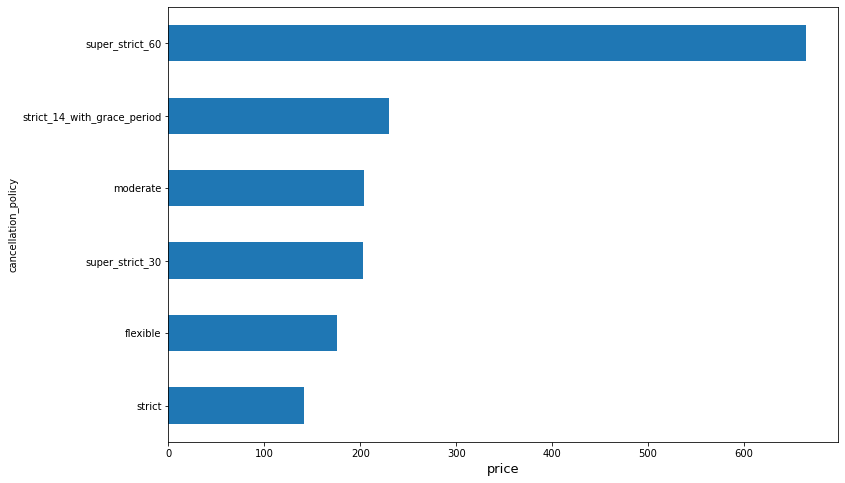

In [179]:
plt.figure(figsize=(12,8))
df2.groupby("cancellation_policy")["price"].mean().sort_values().plot.barh()
plt.xlabel('price', size=13);